## Importing all necessary packages

In [119]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the csv file and converting the date column into datetime format and making the month_year column as index

In [120]:
data = pd.read_csv('Global+Superstore+Data.csv')
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['month_year'] = data['Order Date'].dt.to_period('M')
data = data.set_index('month_year')
data.head()

,Order Date,Segment,Market,Sales,Profit
month_year,,,,,
2012-07,2012-07-31,Consumer,US,2309.650,762.1845
2013-02,2013-02-05,Corporate,APAC,3709.395,-288.7650
2013-10,2013-10-17,Consumer,APAC,5175.171,919.9710
2013-01,2013-01-28,Home Office,EU,2892.510,-96.5400
2013-11,2013-11-05,Consumer,Africa,2832.960,311.5200


In [121]:
data.drop(columns='Order Date', axis=1, inplace=True)

In [122]:
data.head()

,Segment,Market,Sales,Profit
month_year,,,,
2012-07,Consumer,US,2309.650,762.1845
2013-02,Corporate,APAC,3709.395,-288.7650
2013-10,Consumer,APAC,5175.171,919.9710
2013-01,Home Office,EU,2892.510,-96.5400
2013-11,Consumer,Africa,2832.960,311.5200


In [123]:
data.shape

(51290, 4)

### Creating a new column 'Market_Segemnt' as a data preparation process

In [124]:
data['Market_Segment'] = data.Market+'_'+data.Segment

In [125]:
data.sort_index(inplace=True)

In [126]:
data.head(20)

,Segment,Market,Sales,Profit,Market_Segment
month_year,,,,,
2011-01,Consumer,LATAM,60.9600,28.6400,LATAM_Consumer
2011-01,Consumer,US,19.3000,5.7900,US_Consumer
2011-01,Home Office,APAC,51.6285,4.5885,APAC_Home Office
2011-01,Consumer,LATAM,47.9600,15.8000,LATAM_Consumer
2011-01,Consumer,APAC,176.6808,-156.6792,APAC_Consumer
2011-01,Corporate,EU,570.2850,-216.7650,EU_Corporate
2011-01,Home Office,LATAM,195.6480,-34.2520,LATAM_Home Office
2011-01,Consumer,APAC,69.3000,3.4200,APAC_Consumer
2011-01,Consumer,EU,88.2000,18.4500,EU_Consumer


### Creating a new dataframe to calculate the profit aggregate

In [127]:
data_profit_agg = pd.pivot_table(data=data, index=['month_year'], columns=['Market_Segment'], values=['Profit'], aggfunc='sum')


### Spliting the data for calculating the cov

In [128]:
train_len = 42
train_data_profit = data_profit_agg[:train_len]
test_data_profit = data_profit_agg[train_len:]

In [129]:
market_seg_name = []
for col in train_data_profit.columns:
    market_seg_name.append(col[1])
market_seg_name

['APAC_Consumer',
 'APAC_Corporate',
 'APAC_Home Office',
 'Africa_Consumer',
 'Africa_Corporate',
 'Africa_Home Office',
 'Canada_Consumer',
 'Canada_Corporate',
 'Canada_Home Office',
 'EMEA_Consumer',
 'EMEA_Corporate',
 'EMEA_Home Office',
 'EU_Consumer',
 'EU_Corporate',
 'EU_Home Office',
 'LATAM_Consumer',
 'LATAM_Corporate',
 'LATAM_Home Office',
 'US_Consumer',
 'US_Corporate',
 'US_Home Office']

In [130]:
cov = train_data_profit['Profit'].std()/train_data_profit['Profit'].mean()

### Creating a dataframe having COV value for each Market Segment to identify which Market Segment has the most stable profit

In [131]:
df_cov = pd.DataFrame({'Market_Segment' : market_seg_name, 'COV' : cov})
df_cov

,Market_Segment,COV
Market_Segment,,
APAC_Consumer,APAC_Consumer,0.603633
APAC_Corporate,APAC_Corporate,0.740799
APAC_Home Office,APAC_Home Office,1.061530
Africa_Consumer,Africa_Consumer,1.446661
Africa_Corporate,Africa_Corporate,1.685008
Africa_Home Office,Africa_Home Office,2.013987
Canada_Consumer,Canada_Consumer,1.497032
Canada_Corporate,Canada_Corporate,1.219189
Canada_Home Office,Canada_Home Office,2.245148


### The Market Segment with the least COV value is the most stable which is APAC Consumer

In [132]:
df_cov.min()

Market_Segment    APAC_Consumer
COV                    0.603633
dtype: object

### Creating a new dataframe to calculate the Sales aggregate

In [133]:
data_Sales_agg = pd.pivot_table(data=data, index=['month_year'], columns=['Market_Segment'], values=['Sales'], aggfunc='sum')

In [134]:
data_Sales_agg.head()

Sales                                                  \
Market_Segment APAC_Consumer APAC_Corporate APAC_Home Office Africa_Consumer   
month_year                                                                     
2011-01           15711.7125      3374.2098        3973.6623        7909.083   
2011-02           12910.8588     18157.2654        5869.0272        4886.136   
2011-03           19472.5632      8769.7386        4817.5392        2656.830   
2011-04           15440.3046      8985.6765        5739.2580        4004.082   
2011-05           24348.9723     20841.3672        1909.3983        5011.614   

                                                                    \
Market_Segment Africa_Corporate Africa_Home Office Canada_Consumer   
month_year                                                           
2011-01                1760.046           2071.770          314.22   
2011-02                1087.899           2942.562           56.91   
2011-03                1073.934            163.680         1405.26   
2011-04                3767.901           2710.446          286.08   
2011-05                1210.308            487.476          752.01   

                                                                  ...  \
Market_Segment Canada_Corporate Canada_Home Office EMEA_Consumer  ...   
month_year                                                        ...   
2011-01                   16.29                NaN      2790.456  ...   
2011-02                     NaN             440.52      1287.510  ...   
2011-03                     NaN             174.96      9696.108  ...   
2011-04                     NaN                NaN      1769.001  ...   
2011-05                     NaN                NaN      3716.592  ...   

                                                                         \
Market_Segment EMEA_Home Office EU_Consumer EU_Corporate EU_Home Office   
month_year                                                                
2011-01                 299.490   7690.4010    5796.7515       5116.560   
2011-02                1271.310   7553.2620   13917.1065       1165.539   
2011-03                1235.982  12001.3710    5878.8090       3298.173   
2011-04                1364.640  11991.1905   10905.7785       3983.838   
2011-05                2338.068  15412.3005   13112.0340       2603.322   

                                                                             \
Market_Segment LATAM_Consumer LATAM_Corporate LATAM_Home Office US_Consumer   
month_year                                                                    
2011-01           15634.34976      5336.44400         862.23200    6637.151   
2011-02            5107.11752      4535.13420        1036.07936    3458.520   
2011-03           13054.89924      2241.99512        1247.58400   11869.304   
2011-04           10375.44148      2801.01600        4072.28560    9108.612   
2011-05           16335.98724      6934.99556        5167.78400   12819.163   

                                            
Market_Segment US_Corporate US_Home Office  
month_year                                  
2011-01            1701.528       5607.550  
2011-02            1183.668        168.370  
2011-03           11106.799      32714.906  
2011-04           14131.729       5055.004  
2011-05            9142.000       1687.124  

[5 rows x 21 columns]

In [135]:
Sales_data = pd.DataFrame({'Index' : data_Sales_agg.Sales['APAC_Consumer'].index.to_timestamp(), 
                              'APAC_Consumer' : data_Sales_agg.Sales['APAC_Consumer']})
Sales_data = Sales_data.set_index('Index')

### Decomposing the Time Series to understand the Trend, Seasonal pattern of the Sales

### Additive seasonal index

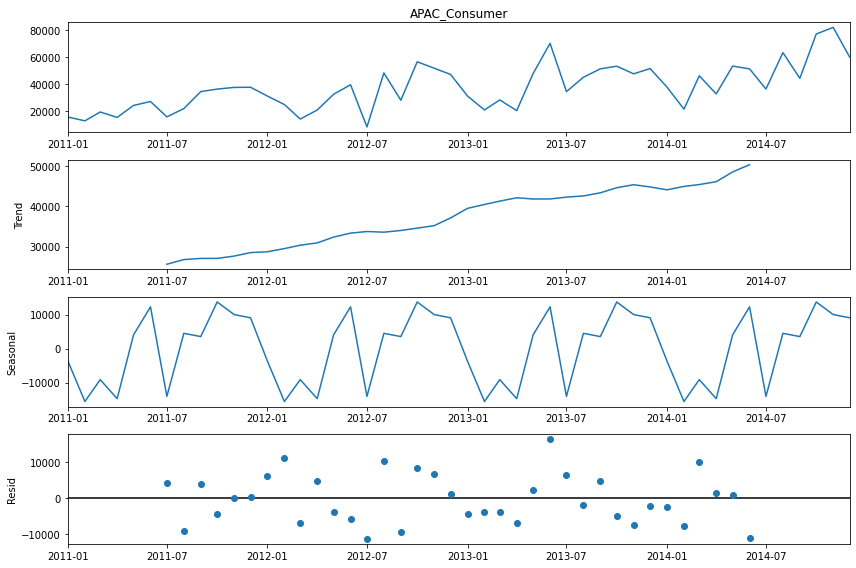

In [136]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(Sales_data['APAC_Consumer'], model='additive') 
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal index

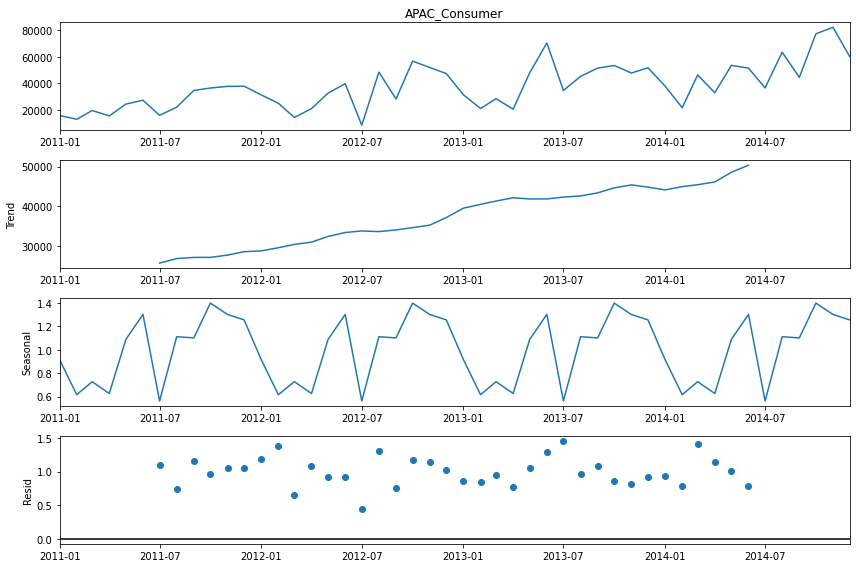

In [137]:
decomposition = sm.tsa.seasonal_decompose(Sales_data['APAC_Consumer'], model='multiplicative') 
fig = decomposition.plot()
plt.show()

### Split time series data into training and test set

In [138]:
train_len = 42
train_data = Sales_data[:train_len]
test_data = Sales_data[train_len:]

In [139]:
train_data['APAC_Consumer'].head()

Index
2011-01-01    15711.7125
2011-02-01    12910.8588
2011-03-01    19472.5632
2011-04-01    15440.3046
2011-05-01    24348.9723
Name: APAC_Consumer, dtype: float64

## Simple time series methods

### Naive Method

In [140]:
y_hat_naive = test_data.copy()
y_hat_naive['naive_forecast'] = train_data['APAC_Consumer'][train_len-1]

### Plot train, test and forecast

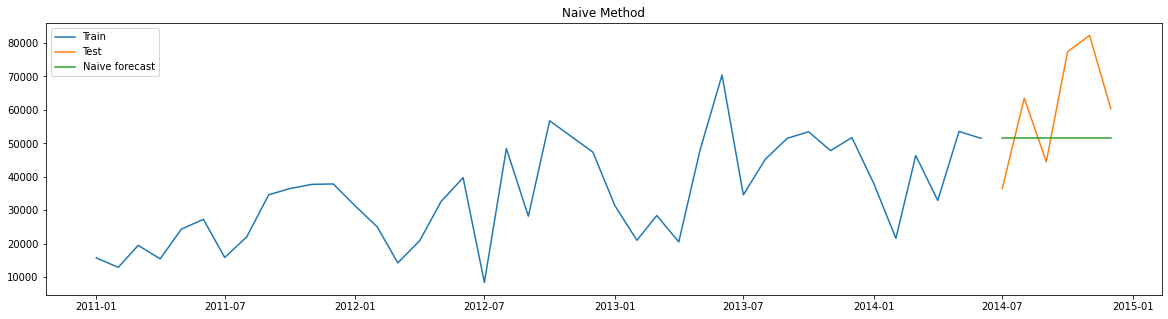

In [141]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [142]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_naive['naive_forecast'])/test_data['APAC_Consumer'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


### Simple average method

In [143]:
y_hat_avg = test_data.copy()
y_hat_avg['Simple_Avg_forecast'] = train_data['APAC_Consumer'].mean()

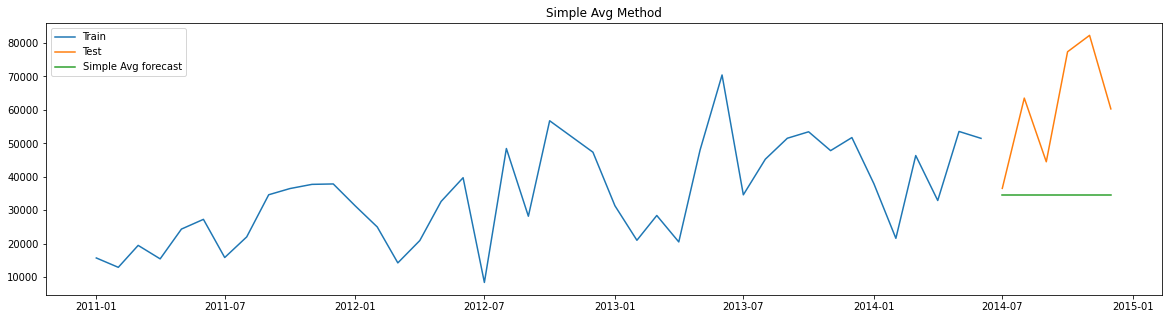

In [144]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_avg['Simple_Avg_forecast'], label='Simple Avg forecast')
plt.legend(loc='best')
plt.title('Simple Avg Method')
plt.show()

In [145]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_avg['Simple_Avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_avg['Simple_Avg_forecast'])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


### Simple moving average method

In [146]:
y_hat_sma = Sales_data['APAC_Consumer'].copy()
ma_window = 12
y_hat_sma['sma_forecast'] = Sales_data['APAC_Consumer'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

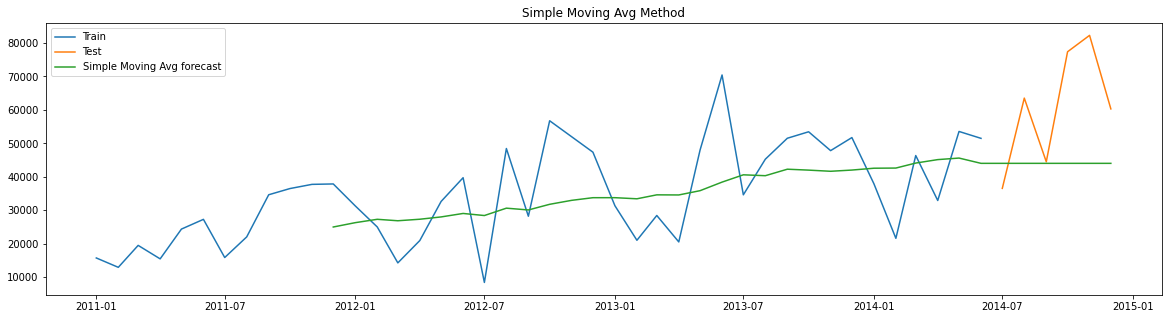

In [147]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Avg forecast')
plt.legend(loc='best')
plt.title('Simple Moving Avg Method')
plt.show()

In [148]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_sma['sma_forecast'][train_len:])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15


## Exponential smoothing methods

### Simple exponential smoothing

In [149]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_data['APAC_Consumer'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test_data.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### Plot train, test and forecast

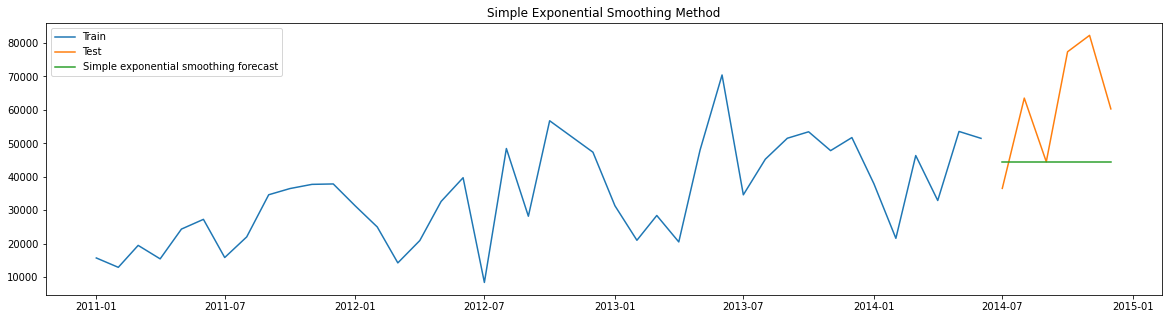

In [150]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [151]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_ses['ses_forecast'])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82


### Holt's method with trend

In [152]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_data['APAC_Consumer']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test_data.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_data))


{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 15711.712500000001, 'initial_slope': -2800.8537000000033, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


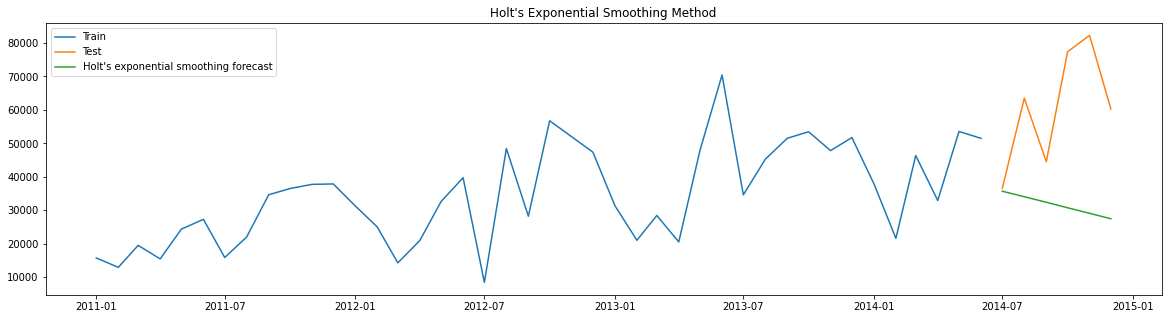

In [153]:
plt.figure(figsize=(20,5))
plt.plot( train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [154]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_holt['holt_forecast'])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57


### Holt Winters' additive method with trend and seasonality

In [155]:
y_hat_hwa = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['APAC_Consumer']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)


{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474945, 'damping_slope': nan, 'initial_level': 29061.291899999585, 'initial_slope': 730.4167145833228, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

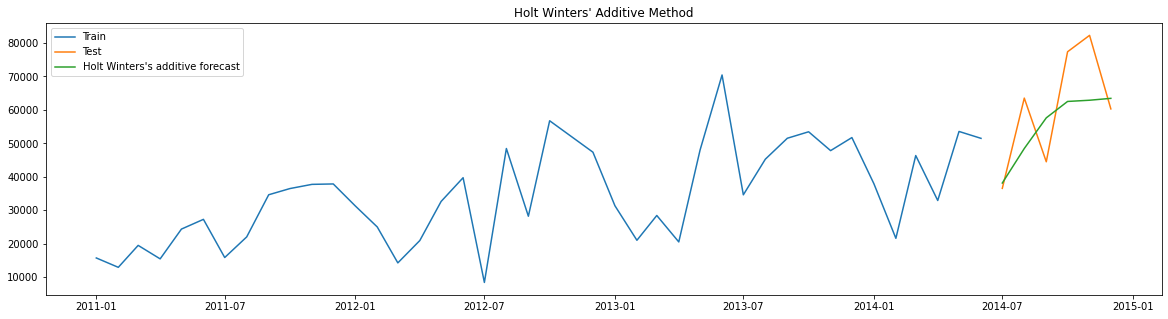

In [156]:
plt.figure(figsize=(20,5))
plt.plot( train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [157]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_hwa['hw_forecast'])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57
0,Holt Winters' additive method,12971.01,17.61


### Holt Winter's multiplicative method with trend and seasonality

In [158]:
y_hat_hwm = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['APAC_Consumer']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)


{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291899999997, 'initial_slope': 730.4167145833331, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

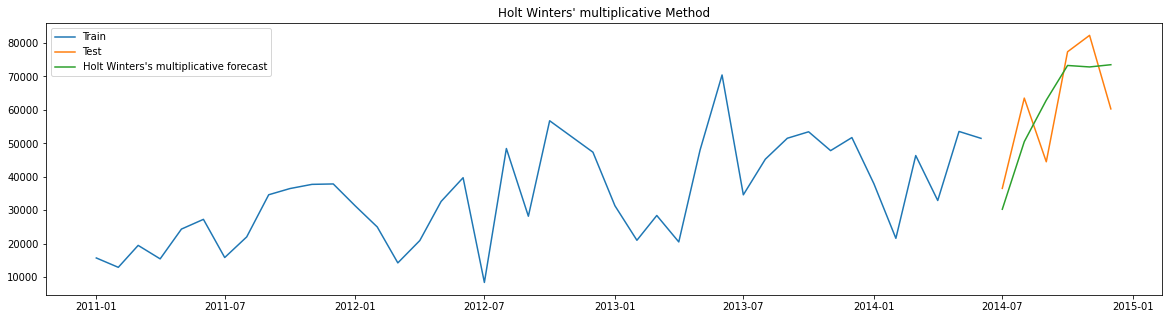

In [159]:
plt.figure(figsize=(20,5))
plt.plot( train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' multiplicative Method')
plt.show()

In [160]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_hwm['hw_forecast'])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62


## Auto Regressive methods

### Stationarity vs non-stationary time series

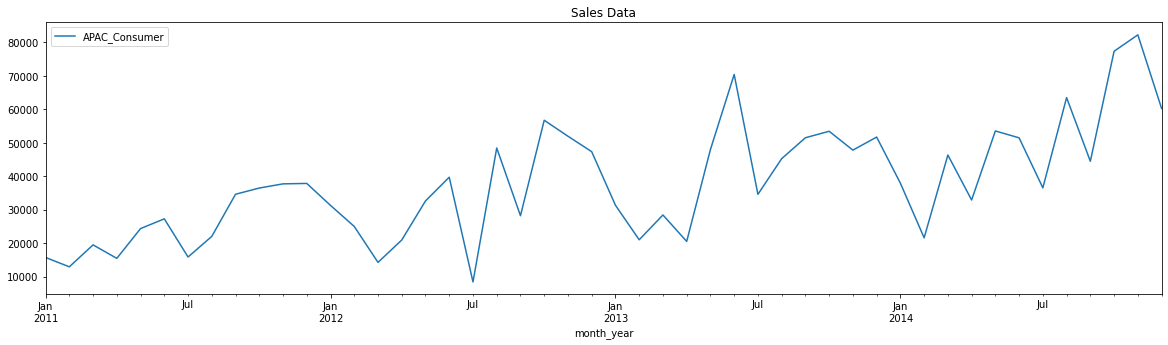

In [161]:
data_Sales_agg.Sales['APAC_Consumer'].plot(figsize=(20, 5))
plt.legend(loc='best')
plt.title('Sales Data')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [162]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_Sales_agg.Sales['APAC_Consumer'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [163]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_Sales_agg.Sales['APAC_Consumer'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


### Box Cox transformation to make variance constant

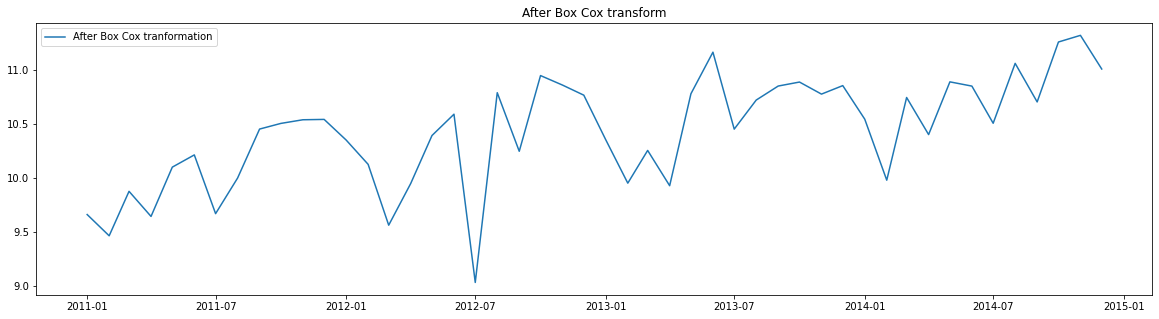

In [164]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(Sales_data['APAC_Consumer'], lmbda=0), index = Sales_data.index)

plt.figure(figsize=(20,5))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

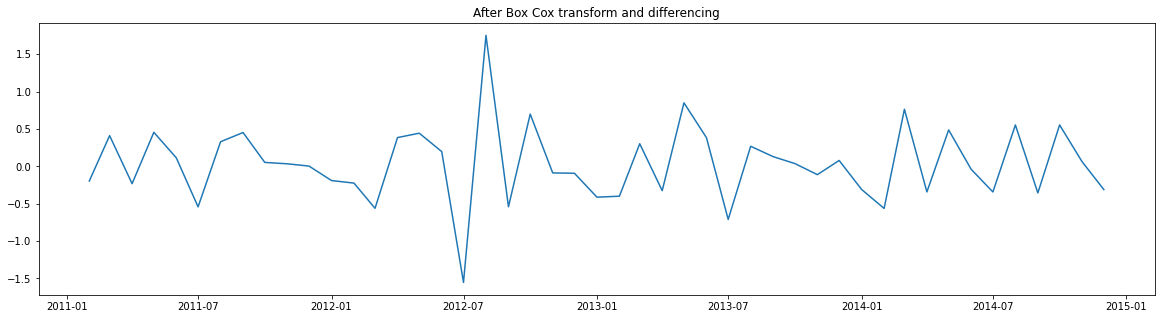

In [165]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), Sales_data.index)
plt.figure(figsize=(20,5))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.title('After Box Cox transform and differencing')
plt.show()

In [166]:
data_boxcox_diff.dropna(inplace=True)

In [167]:
data_boxcox_diff.tail()

Index
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [168]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [169]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


### Autocorrelation function (ACF)

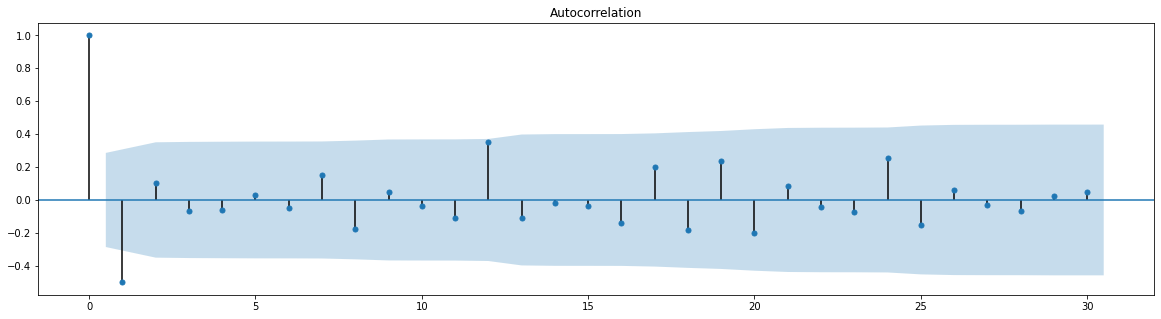

In [170]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(20,5))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

### Partial autocorrelation function (PACF)

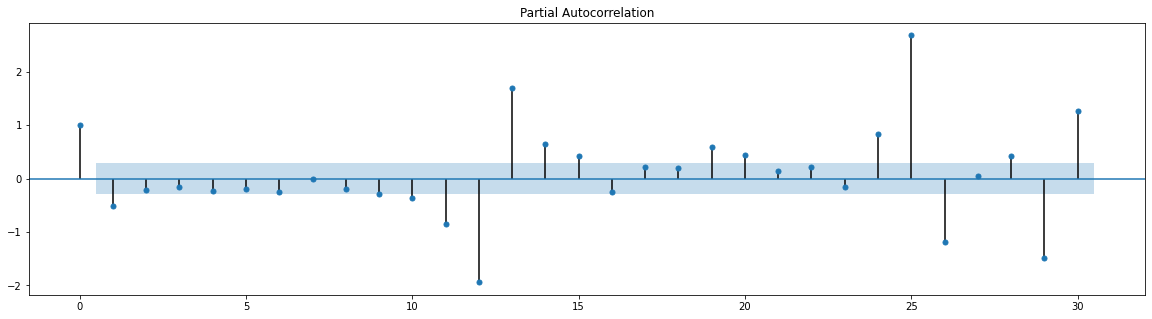

In [171]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,5))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [172]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### Auto regression method (AR)

In [173]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


### Recover original time series

In [174]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

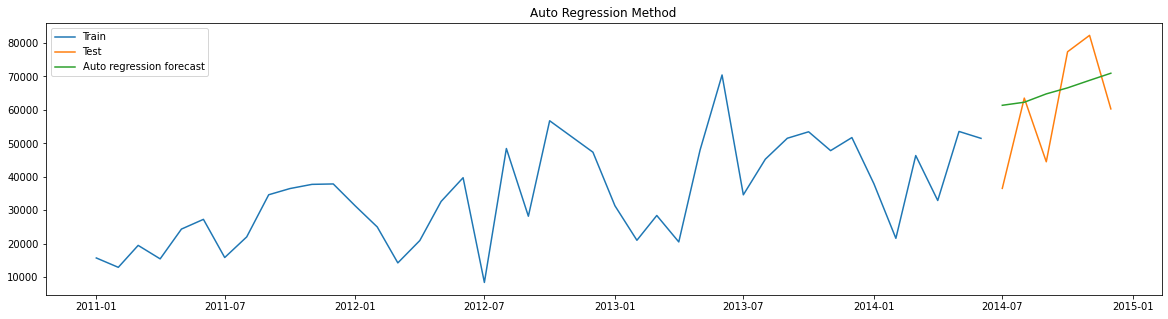

In [175]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_data.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [176]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_ar['ar_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_ar['ar_forecast'][test_data.index.min():])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27


### Moving average method (MA)

In [177]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [178]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

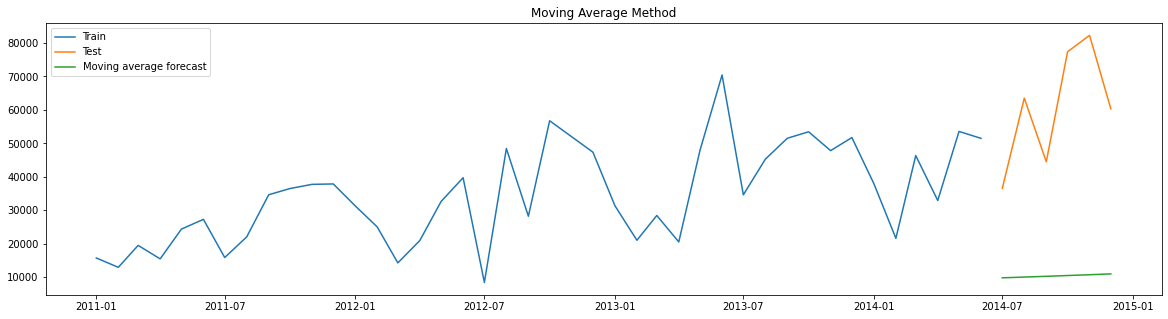

In [179]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'][:train_len], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_data.index.min():], label='Moving average forecast')
plt.legend(loc='left')
plt.title('Moving Average Method')
plt.show()

In [180]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_ma['ma_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_ma['ma_forecast'][test_data.index.min():])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


### Auto regression moving average method (ARMA)

In [181]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115925
ma.L1.y   -0.999958
dtype: float64


### Recover original time series

In [182]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

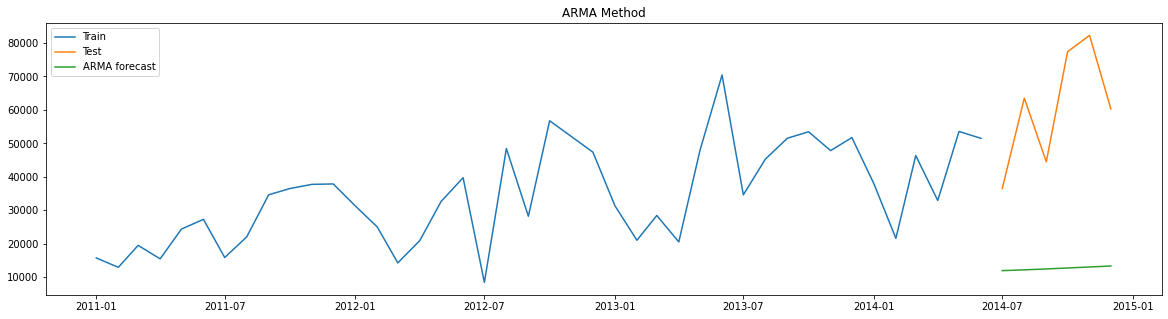

In [183]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'][:train_len], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_data.index.min():], label='ARMA forecast')
plt.legend(loc='left')
plt.title('ARMA Method')
plt.show()

In [184]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_arma['arma_forecast'][train_len-1:])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50758.39,77.66


### Auto regressive integrated moving average (ARIMA)

In [185]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115925
ma.L1.D.y   -0.999958
dtype: float64


### Recover original time series

In [186]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

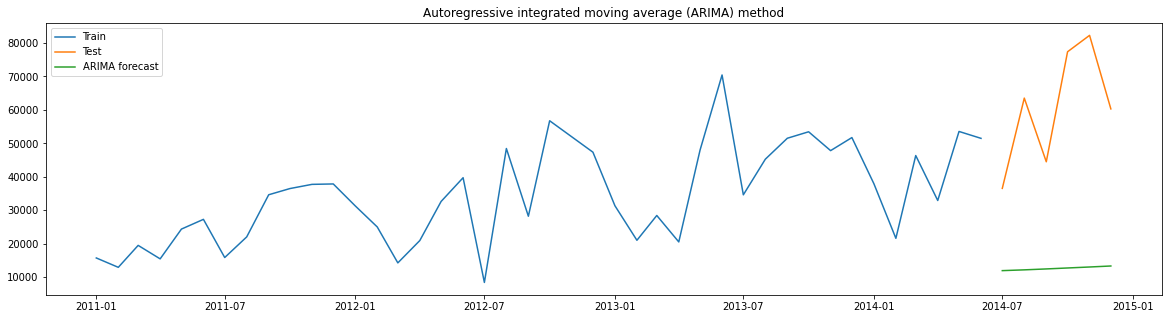

In [187]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'][:train_len], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_data.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [188]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_arima['arima_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_arima['arima_forecast'][test_data.index.min():])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50758.39,77.66


### Seasonal auto regressive integrated moving average (SARIMA)

In [189]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.099405
ma.L1      -0.992906
ar.S.L12   -0.394629
ma.S.L12   -0.983573
sigma2      0.047614
dtype: float64


### Recover original time series

In [190]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

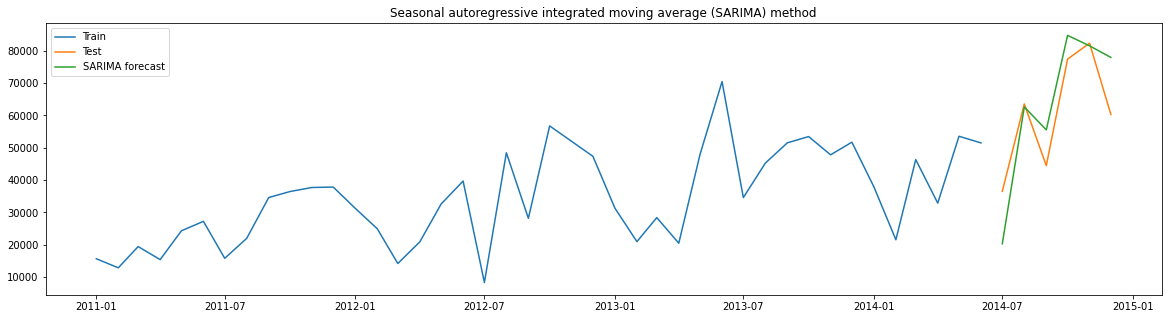

In [191]:
plt.figure(figsize=(20,5))
plt.plot(train_data['APAC_Consumer'][:train_len], label='Train')
plt.plot(test_data['APAC_Consumer'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [192]:
rmse = np.sqrt(mean_squared_error(test_data['APAC_Consumer'], y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['APAC_Consumer']-y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data['APAC_Consumer'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,34412.52,42.57
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50758.39,77.66


In [193]:
Method_Name = ['Naive', 'SA', 'SMA', 'SES', 'Holts ES','HW Add', 'HW Multi', 'AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA']
results.Method = Method_Name
results

,Method,RMSE,MAPE
0,Naive,18774.05,26.86
0,SA,30846.00,38.18
0,SMA,23383.65,28.15
0,SES,23112.44,27.82
0,Holts ES,34412.52,42.57
0,HW Add,12971.01,17.61
0,HW Multi,11753.42,19.62
0,AR,15505.02,27.27
0,MA,52903.35,81.64
0,ARMA,50758.39,77.66


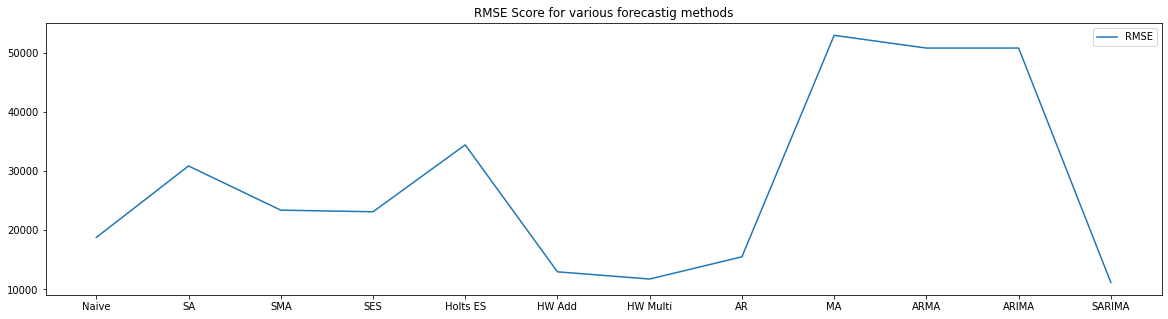

In [194]:
plt.figure(figsize=(20,5))
plt.plot(results['Method'], results['RMSE'], label='RMSE' )

plt.legend(loc='best')
plt.title('RMSE Score for various forecastig methods')
plt.show()

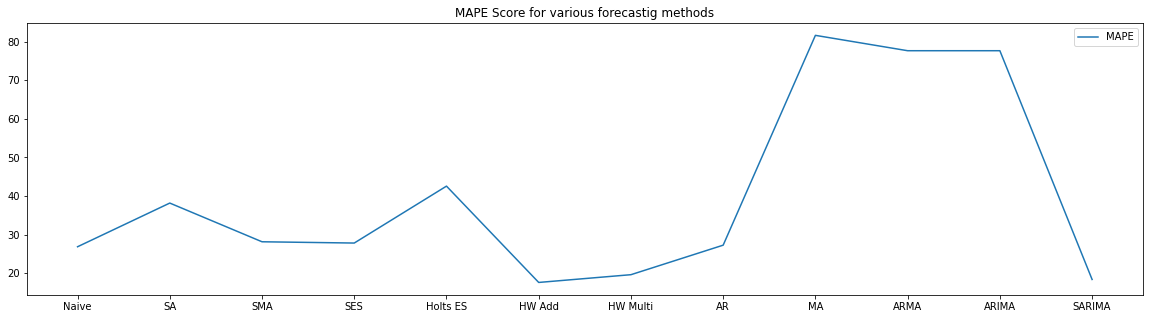

In [195]:
plt.figure(figsize=(20,5))
plt.plot(results['Method'], results['MAPE'], label='MAPE' )
plt.legend(loc='best')
plt.title('MAPE Score for various forecastig methods')
plt.show()